# Financial Accounting - HW5

<p style="text-align: right;"><i>Anirudh Narayanan</i></p>

In [1]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import pylab as pl

#supressing chained assignment warnings
pd.options.mode.chained_assignment = None

# Q1 - Comparison between EPS and ROA YoY Changes

In [2]:
#Reading file and removing duplicate rows
hw5 = pd.read_csv('hw5_data.csv')
hw5_dedup = hw5[hw5.duplicated() == False]

hw5_dedup.head()

,gvkey,datadate,fyearq,fqtr,conm,rdq,actq,atq,ceqq,cshoq,dlttq,lctq,niq,revtq,cogsy,oancfy,prccq,gind,sic
0,1013,31jan1995,1995,1,ADC TELECOMMUNICATIONS INC,23feb1995,207.183,341.775,275.321,27.989,0.410,63.975,10.466,121.774,57.206,6.023,49.000,452010,3661
1,1013,31jan1996,1996,1,ADC TELECOMMUNICATIONS INC,26feb1996,452.610,617.158,527.783,62.778,0.000,88.119,16.313,162.591,78.256,4.874,38.625,452010,3661
2,1013,30apr1996,1996,2,ADC TELECOMMUNICATIONS INC,28may1996,457.474,653.732,554.654,64.084,0.444,97.524,19.899,193.053,174.763,3.396,42.000,452010,3661
3,1013,31jul1996,1996,3,ADC TELECOMMUNICATIONS INC,27aug1996,448.275,704.421,581.979,64.891,8.777,112.475,23.172,217.313,284.018,26.729,42.250,452010,3661
4,1013,31oct1996,1996,4,ADC TELECOMMUNICATIONS INC,11dec1996,499.501,768.765,617.470,65.177,6.913,142.079,28.079,255.052,410.288,63.457,68.375,452010,3661


### Part 1 - Earnings per Share plot

In [3]:
#creating a column for earnings per share
hw5_dedup['EPS'] = hw5_dedup['niq']/hw5_dedup['cshoq']
print 'Mean EPS: {:.6f}'.format(hw5_dedup['EPS'].mean())

#sorting and shifting data for getting the eps_change variable 
hw5_dedup = hw5_dedup.sort_values(by  = ['conm','fqtr','fyearq'])

#only subtract rows where the year is (lag year + 1) and quarters and company name lags matches
hw5_dedup['eps_change'] = (hw5_dedup['EPS'] - hw5_dedup['EPS'].shift(1)) \
                            [(hw5_dedup['fyearq'] == hw5_dedup['fyearq'].shift(1) + 1) &\
                             (hw5_dedup['fqtr'] == hw5_dedup['fqtr'].shift(1) ) &\
                             (hw5_dedup['conm'] ==  hw5_dedup['conm'].shift(1) ) ]

#printing mean for cross-checking
print 'Mean EPS Change: {:.6f}'.format(hw5_dedup['eps_change'].round(2).mean())

Mean EPS: 0.489338
Mean EPS Change: 0.007470


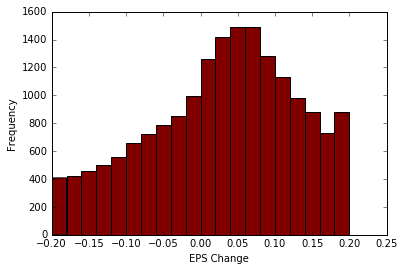

In [4]:
%matplotlib inline
data = hw5_dedup['eps_change'].round(2)[hw5_dedup['eps_change'].round(2).abs()<=0.2 ].dropna()
pl.hist(data,bins = 20, color = 'maroon')
pl.xlabel('EPS Change')
pl.ylabel('Frequency')
pl.show()

#### Observations

For a company in successive quarters, the number of shares (the denominator in EPS) remains more or less the same. But the net income (numerator in EPS) is either positive or negative. Hence the change in this ratio over successive periods is quite varied.

### Part 2 - Return on Assets plot

In [5]:
#Column for return on assets
hw5_dedup['ROA'] = hw5_dedup['niq']/hw5_dedup['atq']
print 'Mean ROA: {:.6f}'.format(hw5_dedup['ROA'].mean())


#Similar logic as above for calculating change
hw5_dedup['roa_change'] = (hw5_dedup['ROA'] - hw5_dedup['ROA'].shift(1)) \
                            [(hw5_dedup['fyearq'] == hw5_dedup['fyearq'].shift(1) + 1) &\
                             (hw5_dedup['fqtr'] == hw5_dedup['fqtr'].shift(1) ) &\
                             (hw5_dedup['conm'] ==  hw5_dedup['conm'].shift(1)) ]

# printing mean for cross-checking

print 'Mean ROA Change: {:.6f}'.format(hw5_dedup['roa_change'].round(2).mean())

Mean ROA: 0.014502
Mean ROA Change: -0.000462


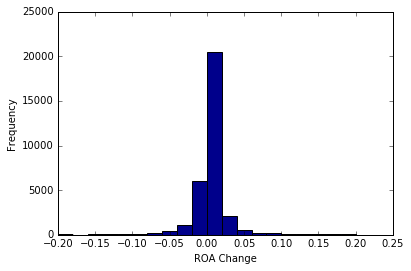

In [6]:
%matplotlib inline
data = hw5_dedup['roa_change'].round(2)[hw5_dedup['roa_change'].round(2).abs()<=0.2 ].dropna()
pl.hist(data, bins = 20, color = 'darkblue')
pl.xlabel('ROA Change')
pl.ylabel('Frequency')
pl.show()

#### Observation

In contrast to the EPS change plot, we can see that the ROA change plot does not show as much spread. In fact, majority of the values are 0.
ROA change represents if a company gets better or worse in terms of asset utilization. A majority of 0 values means as that as assets increase (denominator in ROA) so does net income (numerator in ROA), hence leading to a constant ROA and 0 ROA change.

 #### Comparison in Graphs

We can see from the graphs that majority of ROA Changes are 0 whereas EPS changes are more spread out.

Economic explanation behind this would be that companies' utilization of assets is more or less constant, i.e majority of companies do not have disproportionate returns on new assets. Alternatively, new assets cause net income increases in such a manner that the ratio ends up the same over the periods.

Hence, in terms of evaluating a company's value, EPS would be a better metric than just looking at ROA.

# Q2 - Piotrosky F-Score

### Part 1 -  Calculating the f-score

In [7]:
#Calculating the components for F-Score


#NET INCOME
hw5_dedup['d_netincome'] = np.where(hw5_dedup['niq'] > 0 , 1 , 0)
print 'd_netincome: {:.6f}'.format(hw5_dedup['d_netincome'].mean())



#OPERATING CASH FLOW
hw5_dedup['d_operating'] = np.where(hw5_dedup['oancfy'] > 0 , 1, 0)
print 'd_operating: {:.6f}'.format(hw5_dedup['d_operating'].mean())



#RETURN ON ASSETS
hw5_dedup['d_roa'] = np.where(hw5_dedup['roa_change'].isnull(), np.nan, np.where(hw5_dedup['roa_change'] > 0, 1, 0 ))
print 'd_roa: {:.6f}'.format(hw5_dedup['d_roa'].mean())



#QUALITY OF EARNINGS
hw5_dedup['d_quality'] = np.where( hw5_dedup['oancfy'] > hw5_dedup['niq'], 1, 0)
print 'd_quality: {:.6f}'.format(hw5_dedup['d_quality'].mean())



#LONG-TERM DEBTS VS ASSETS
hw5_dedup['dta_ratio_change'] = (hw5_dedup['dlttq']/hw5_dedup['atq'] - hw5_dedup['dlttq'].shift(1)/hw5_dedup['atq'].shift(1))\
                            [(hw5_dedup['fyearq'] == hw5_dedup['fyearq'].shift(1) + 1) &\
                             (hw5_dedup['fqtr'] == hw5_dedup['fqtr'].shift(1) ) &\
                             (hw5_dedup['conm'] ==  hw5_dedup['conm'].shift(1) )]

hw5_dedup['d_longterm'] = np.where(hw5_dedup['dta_ratio_change'].isnull(), np.nan, \
                                   np.where(hw5_dedup['dta_ratio_change'] < 0, 1, 0 ))
print 'd_longterm: {:.6f}'.format(hw5_dedup['d_longterm'].mean())



#CURRENT RATIO
hw5_dedup['cr_change'] = (hw5_dedup['actq']/hw5_dedup['lctq'] - hw5_dedup['actq'].shift(1)/hw5_dedup['lctq'].shift(1))\
                            [(hw5_dedup['fyearq'] == hw5_dedup['fyearq'].shift(1) + 1) &\
                             (hw5_dedup['fqtr'] == hw5_dedup['fqtr'].shift(1) ) &\
                             (hw5_dedup['conm'] ==  hw5_dedup['conm'].shift(1) )]
    
hw5_dedup['d_currentratio'] = np.where(hw5_dedup['cr_change'].isnull(), np.nan, \
                                   np.where(hw5_dedup['cr_change'] > 0, 1, 0 ))
print 'd_currentratio: {:.6f}'.format(hw5_dedup['d_currentratio'].mean())


#SHARES OUTSTANDING
hw5_dedup['shareout_change'] = (hw5_dedup['cshoq'] - hw5_dedup['cshoq'].shift(1))\
                                [(hw5_dedup['fyearq'] == hw5_dedup['fyearq'].shift(1) + 1) &\
                             (hw5_dedup['fqtr'] == hw5_dedup['fqtr'].shift(1) ) &\
                             (hw5_dedup['conm'] ==  hw5_dedup['conm'].shift(1) )]

hw5_dedup['d_shareout'] = np.where(hw5_dedup['shareout_change'].isnull(), np.nan, \
                                   np.where(hw5_dedup['shareout_change'] <= 0, 1, 0 ))
print 'd_shareout: {:.6f}'.format(hw5_dedup['d_shareout'].mean())


#GROSS MARGIN
hw5_dedup['gm'] = (hw5_dedup['revtq'] - hw5_dedup['cogsy'])/hw5_dedup['revtq']

hw5_dedup['gm_change'] = (hw5_dedup['gm'] - hw5_dedup['gm'].shift(1))\
                                [(hw5_dedup['fyearq'] == hw5_dedup['fyearq'].shift(1) + 1) &\
                             (hw5_dedup['fqtr'] == hw5_dedup['fqtr'].shift(1) ) &\
                             (hw5_dedup['conm'] ==  hw5_dedup['conm'].shift(1) )]
    
hw5_dedup['d_gm'] = np.where(hw5_dedup['gm_change'].isnull(), np.nan, \
                                   np.where(hw5_dedup['gm_change'] > 0, 1, 0 ))
print 'd_gm: {:.6f}'.format(hw5_dedup['d_gm'].mean())


#ASSET TURNOVER
hw5_dedup['at'] = hw5_dedup['revtq']/hw5_dedup['atq']
hw5_dedup['at_change'] = (hw5_dedup['at'] - hw5_dedup['at'].shift(1))\
                            [(hw5_dedup['fyearq'] == hw5_dedup['fyearq'].shift(1) + 1) &\
                             (hw5_dedup['fqtr'] == hw5_dedup['fqtr'].shift(1) ) &\
                             (hw5_dedup['conm'] ==  hw5_dedup['conm'].shift(1) )]
    
hw5_dedup['d_at'] = np.where(hw5_dedup['at_change'].isnull(), np.nan, \
                                   np.where(hw5_dedup['at_change'] > 0, 1, 0 ))
print 'd_at: {:.6f}'.format(hw5_dedup['d_at'].mean())

d_netincome: 0.874272
d_operating: 0.874620
d_roa: 0.521522
d_quality: 0.805308
d_longterm: 0.526801
d_currentratio: 0.510183
d_shareout: 0.407228
d_gm: 0.516305
d_at: 0.492691


In [8]:
#Calculating the final F-Score
hw5_dedup['f_score'] = hw5_dedup['d_netincome'] +\
                        hw5_dedup['d_operating'] +\
                        hw5_dedup['d_roa'] +\
                        hw5_dedup['d_quality'] +\
                        hw5_dedup['d_longterm'] +\
                        hw5_dedup['d_currentratio'] +\
                        hw5_dedup['d_shareout'] +\
                        hw5_dedup['d_gm'] +\
                        hw5_dedup['d_at']


print 'Mean Pitrioski\'s F-Score: {:.4f}'.format(hw5_dedup['f_score'].mean())

Mean Pitrioski's F-Score: 5.5423


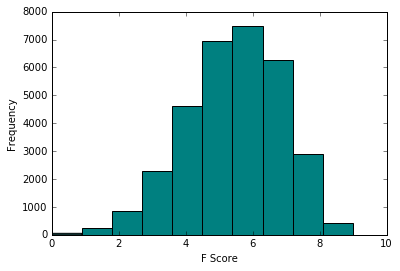

In [9]:
%matplotlib inline

#Plotting F-score distribution
data = hw5_dedup['f_score'].round(2).dropna()
pl.hist(data,color = 'teal')
pl.xlabel('F Score')
pl.ylabel('Frequency')
pl.show()

In [10]:
print 'Fraction of companies with F-score >= 7 : {:.2f}%'.format(float(100*len(hw5_dedup[hw5_dedup['f_score'] >= 7]))\
                                                                /len(hw5_dedup[hw5_dedup['f_score'].isnull()==False]) )

Fraction of companies with F-score >= 7 : 29.88%


### Part 2 - Book to Market Ratio

In [11]:
#Market ratio = SE/Market Cap
#             = (Total Assets - Total Liabilities)/(Stock Price * Number of shares)

hw5_dedup['btm'] = hw5_dedup['ceqq']/(hw5_dedup['prccq']*hw5_dedup['cshoq'])
print 'Mean BTM Ratio: {:.3f}'.format(hw5_dedup['btm'].mean())

Mean BTM Ratio: 0.445


In [12]:
hw5_dedup['btm_quantile'] = hw5_dedup.groupby(by='fyearq')['btm'].transform(\
                                            lambda x: pd.qcut(x,5, labels = range(1,6))
                                                             )

print 'Fraction of companies with F-score >= 7 & Top quantile BTM: {:.2f}%'.\
                            format(float(100*len(hw5_dedup[(hw5_dedup['f_score'] >=7) & (hw5_dedup['btm_quantile'] == 5)]))\
                                   /len(hw5_dedup[hw5_dedup['f_score'].isnull()==False]) )

Fraction of companies with F-score >= 7 & Top quantile BTM: 4.64%


In [13]:
print hw5_dedup.groupby('btm_quantile')['f_score'].mean()

btm_quantile
1.0    5.671882
2.0    5.747823
3.0    5.615169
4.0    5.485331
5.0    5.192266
Name: f_score, dtype: float64


#### Explanation

The book to market ratio of a company represents value that the company is held at. Higher BTM ratio implies that a company is greatly undervalued (i.e book value is good but market value isn't). Theoretically, this indicates companies that are the best 'buys'.

However, as the data suggests, we can see that as BTM ratio increases, there is first an increase and then decrease in F-Score. Furthermore, if we look at the results of a correlation between btm and f-score we can see that there is no relation at all between BTM ratio and F-score.

In [14]:
#Checking correlation between fscores and btm ratios

corr_data = hw5_dedup[(hw5_dedup['f_score'].isnull()==False) & (hw5_dedup['btm'].isnull()==False)]
print np.corrcoef(corr_data['f_score'],corr_data['btm'])

[[ 1.         -0.12803482]
 [-0.12803482  1.        ]]


End conclusion is that the BTM ratio cannot be the sole measure by which a company's value can be judged. One needs a combination of both BTM Ratio and the F-score to make a call on this matter.